In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Check missing values
missing = df.isnull().sum()
print('Missing values per column:\n', missing)

# Basic statistics
stats = df.describe().T
stats['median'] = df.median()
stats

Missing values per column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,count,mean,std,min,25%,50%,75%,max,median
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4,149.75
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6,22.90
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0,25.75
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0,16.00


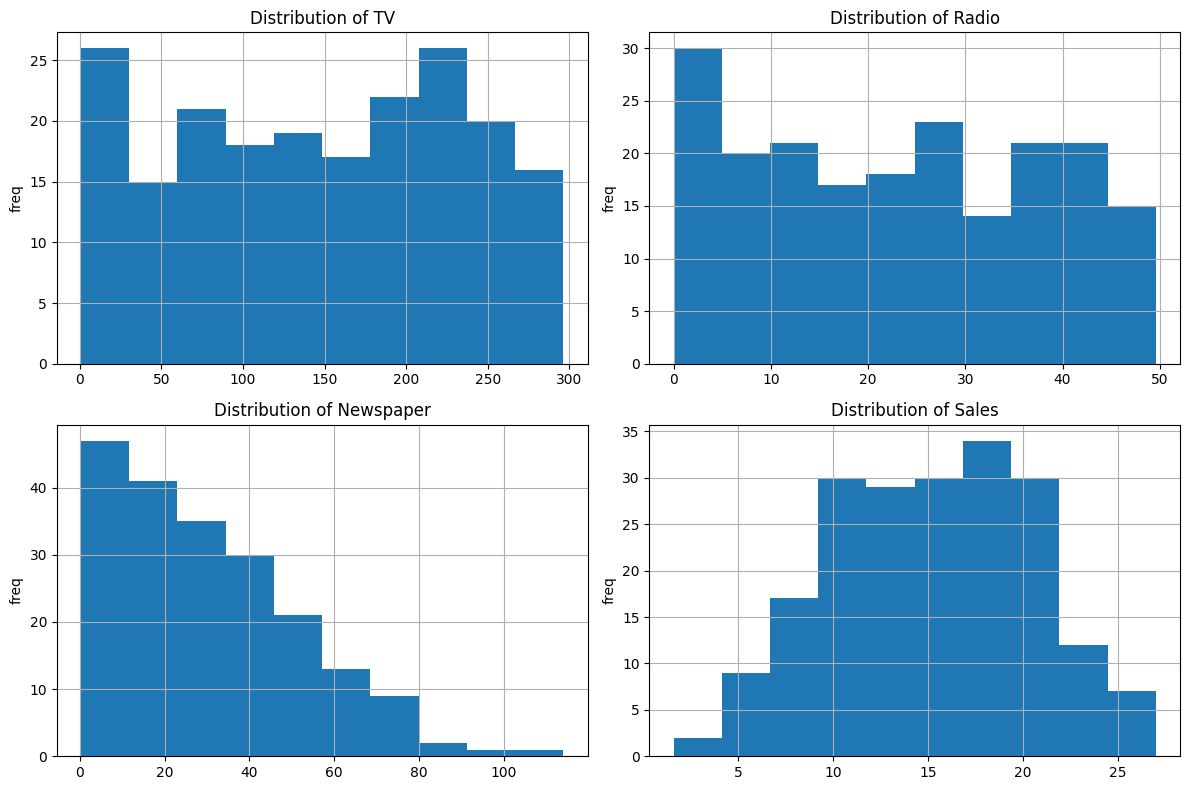

<Figure size 1000x1000 with 0 Axes>

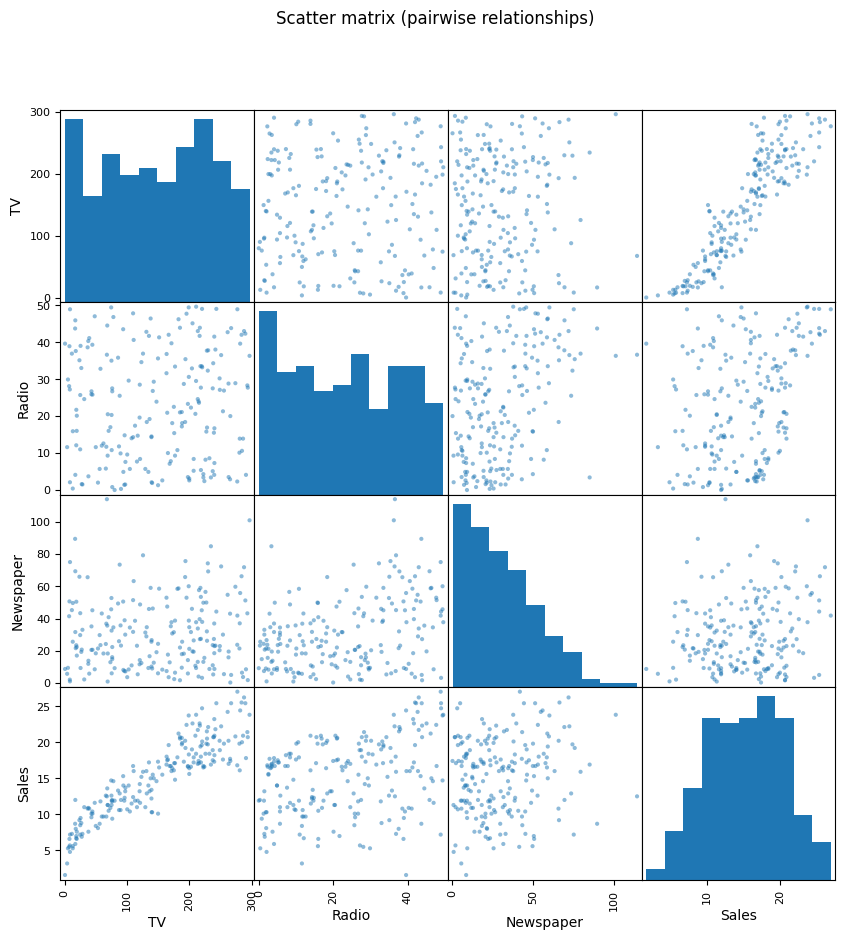

In [5]:
# Visualize distributions (histograms) and pairwise scatter matrix

cols = ['TV','Radio','Newspaper','Sales']
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()
for i, c in enumerate(cols):
    ax = axes[i]
    df[c].hist(ax=ax)
    ax.set_title(f'Distribution of {c}')
    ax.set_ylabel('freq')
plt.tight_layout()
plt.show()

# Scatter matrix
plt.figure(figsize=(10,10))
scatter_matrix(df[cols], diagonal='hist', figsize=(10,10))
plt.suptitle('Scatter matrix (pairwise relationships)')
plt.show()

In [6]:
# Features and target
X = df[['TV','Radio','Newspaper']].copy()
y = df['Sales'].copy()

print('Feature columns:', X.columns.tolist())
print('Target: Sales')

Feature columns: ['TV', 'Radio', 'Newspaper']
Target: Sales


In [7]:
from collections import defaultdict

split_ratios = [(0.8,0.2),(0.7,0.3),(0.6,0.4)]
results = []

for train_ratio, test_ratio in split_ratios:
    test_size = round(test_ratio,2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    # record split sizes
    split_info = {
        'train_ratio': train_ratio,
        'test_ratio': test_ratio,
        'train_size': X_train.shape[0],
        'test_size': X_test.shape[0]
    }

    # 1) Simple linear regression using TV only
    lr_tv = LinearRegression()
    lr_tv.fit(X_train[['TV']], y_train)
    y_pred_tv = lr_tv.predict(X_test[['TV']])
    metrics_tv = {
        'model': 'Simple (TV)',
        'r2': r2_score(y_test, y_pred_tv),
        'mse': mean_squared_error(y_test, y_pred_tv),
        'mae': mean_absolute_error(y_test, y_pred_tv)
    }

    # 2) Multiple linear regression using TV, Radio, Newspaper
    lr_all = LinearRegression()
    lr_all.fit(X_train, y_train)
    y_pred_all = lr_all.predict(X_test)
    metrics_all = {
        'model': 'Multiple (TV+Radio+Newspaper)',
        'r2': r2_score(y_test, y_pred_all),
        'mse': mean_squared_error(y_test, y_pred_all),
        'mae': mean_absolute_error(y_test, y_pred_all)
    }

    # store results
    results.append({**split_info, **metrics_tv})
    results.append({**split_info, **metrics_all})

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df['train_ratio'] = results_df['train_ratio'].astype(str) + ':' + (results_df['test_ratio']).astype(str)
results_df = results_df[['train_ratio','train_size','test_size','model','r2','mse','mae']]
results_df

,train_ratio,train_size,test_size,model,r2,mse,mae
0,0.8:0.2,160,40,Simple (TV),0.802561,6.101073,1.950295
1,0.8:0.2,160,40,Multiple (TV+Radio+Newspaper),0.905901,2.907757,1.274826
2,0.7:0.3,140,60,Simple (TV),0.814855,5.179525,1.806912
3,0.7:0.3,140,60,Multiple (TV+Radio+Newspaper),0.909148,2.541624,1.159488
4,0.6:0.4,120,80,Simple (TV),0.812648,5.165623,1.817754
5,0.6:0.4,120,80,Multiple (TV+Radio+Newspaper),0.901592,2.713287,1.228792


In [8]:
results_df

,train_ratio,train_size,test_size,model,r2,mse,mae
0,0.8:0.2,160,40,Simple (TV),0.802561,6.101073,1.950295
1,0.8:0.2,160,40,Multiple (TV+Radio+Newspaper),0.905901,2.907757,1.274826
2,0.7:0.3,140,60,Simple (TV),0.814855,5.179525,1.806912
3,0.7:0.3,140,60,Multiple (TV+Radio+Newspaper),0.909148,2.541624,1.159488
4,0.6:0.4,120,80,Simple (TV),0.812648,5.165623,1.817754
5,0.6:0.4,120,80,Multiple (TV+Radio+Newspaper),0.901592,2.713287,1.228792
